In [ ]:
%cd "/content/drive/MyDrive/praktikum_backup"

/content/drive/MyDrive/praktikum_backup


In [ ]:
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x_train = np.load("xtrain.npy")
x_test = np.load("xval.npy")
y_train = np.load("ytrain.npy")
y_test = np.load("yval.npy")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, Dropout, GlobalMaxPool2D, AveragePooling2D, GlobalAveragePooling2D,BatchNormalization, Activation

In [ ]:
del model

In [ ]:
model = Sequential()

model.add(InputLayer(input_shape=[100,100,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))


model.add(GlobalAveragePooling2D())
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 100, 100, 16)      448       
_________________________________________________________________
average_pooling2d (AveragePo (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
average_pooling2d_1 (Average (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
average_pooling2d_2 (Average (None, 13, 13, 64)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)               

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
H = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
19/19 [==============================] - 6s 300ms/step - loss: 0.6954 - acc: 0.4832 - val_loss: 0.6932 - val_acc: 0.5195
Epoch 2/100
19/19 [==============================] - 6s 292ms/step - loss: 0.6935 - acc: 0.4782 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 3/100
19/19 [==============================] - 6s 291ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 4/100
19/19 [==============================] - 6s 296ms/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 5/100
19/19 [==============================] - 6s 293ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 6/100
19/19 [==============================] - 6s 294ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 7/100
19/19 [==============================] - 6s 293ms/step - loss: 0.6932 - acc: 0.4648 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 8/100
19/19 [==============================] - 6s 291ms/step - 

In [ ]:
del model

In [ ]:
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))


8/8 - 1s - loss: 0.7484 - acc: 0.6602
Untrained model, accuracy: 66.02%


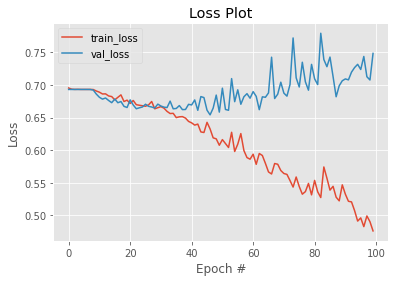

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

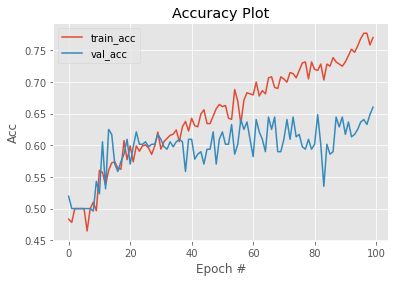

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
model.save("CNNModel2.h5")